In [1]:
'''
K-means steps:
    Pick a random starting point c_k for k clusters
    For each point, add it to the set S_k of the centroid it is closest to
    Recompute c_k as the mean (centroid of the set S_k)
    Do until c_k doesn't change for any k
    
    
For large collections of points iteration till convergence can take very long time.
Some predefined number of iterations is used to make it feasible
'''

# Set up some hyper-parameters:


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


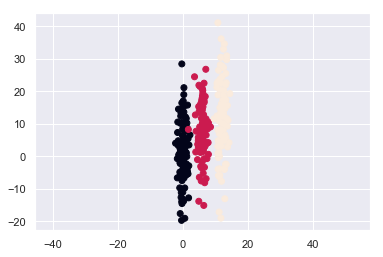

In [8]:
# Define some points in 3 clusters and plot them
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
# Set up the hyper-parameters
max_iterations = 5000
k = 3

points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([6, 6], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([12, 12], [[1, 0], [0, 100]] , 100))))
true_class_colors = np.hstack((np.ones(100),np.ones(100)*2,np.ones(100)*3))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')

# The colors are the "true classes", which we will see unsupervised learning does not
# discover effectively (with this algorithm).

In [12]:
true_class_colors.shape

(300,)

In [3]:
print(true_class_colors.shape)
print(points.shape)

(300,)
(300, 2)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


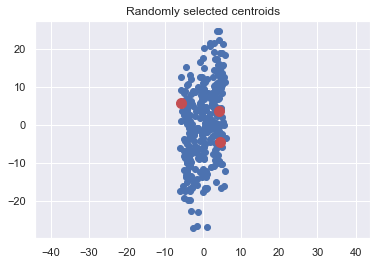

In [4]:
# Choose k random points from the set to be our starting "centroids"
def get_random_centroids(points,number):
    return points[np.random.permutation(len(points))[0:number]]

centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# Plotting the original randomly selected centroids

[1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 2. 2. 0. 1. 1. 0. 1. 0. 2. 1. 0. 2.
 1. 2. 0. 0. 0. 1. 2. 1. 2. 2. 2. 0. 0. 0. 0. 0. 0. 2. 0. 2. 1. 0. 1. 2.
 0. 0. 0. 1. 0. 0. 1. 2. 2. 0. 0. 1. 1. 0. 1. 0. 2. 0. 0. 2. 2. 2. 0. 0.
 0. 0. 1. 2. 1. 2. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 2. 0. 2. 0. 0. 0. 1. 2.
 1. 0. 0. 2. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 2. 0. 0. 0. 2. 0. 0. 2. 2. 2. 0. 2. 0. 2. 0.
 0. 2. 0. 0. 0. 2. 2. 2. 2. 0. 2. 0. 0. 2. 2. 2. 2. 0. 0. 2. 0. 2. 2. 0.
 0. 0. 0. 0. 2. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 2. 2. 2. 0. 0.
 2. 2. 0. 0. 0. 2. 2. 2. 2. 0. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 2. 2. 2. 0. 2. 0. 0. 0. 2. 0.]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


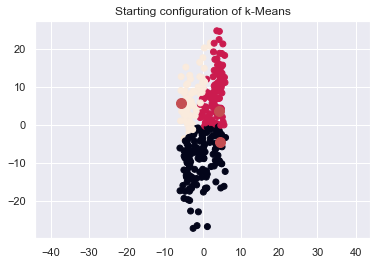

In [5]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def get_nearest_centroid_for_all_points(points,centroids):
    clusters = np.zeros(len(points))
    for i in range(len(points)):
        distances = dist(points[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

print(get_nearest_centroid_for_all_points(points,centroids))
closest = get_nearest_centroid_for_all_points(points,centroids)

# closest above: the nearest centroid for each point p_i

plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('Starting configuration of k-Means')
plt.show()

3
[[-0.49529045 -9.0281942 ]
 [ 2.91603117  8.14317114]
 [-2.72110884  6.83424993]]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


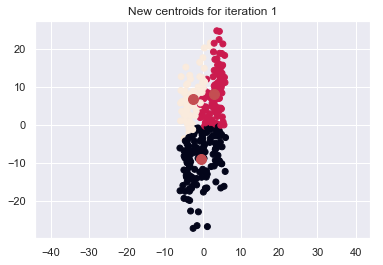

In [6]:
# Recalculate the centroids for each cluster based on the points that were added
# to it.
def move_centroids(points,closest,centroids):
    print(centroids.shape[0])
    for k in range(centroids.shape[0]):
        cluster = points[closest==k]
        centroids[k] = cluster.mean(axis=0)
    return centroids

new_centroids = move_centroids(points,closest,centroids)
print(new_centroids)
plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('New centroids for iteration 1')
plt.show()

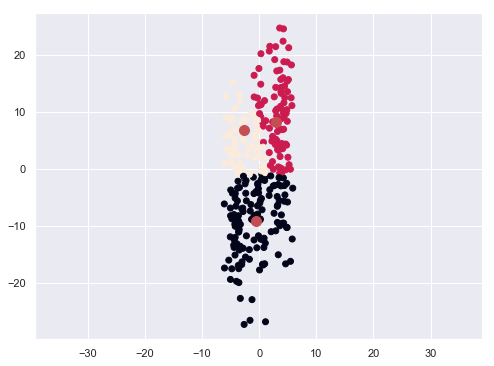

3


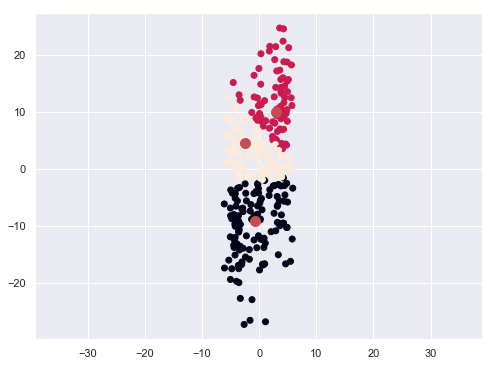

3


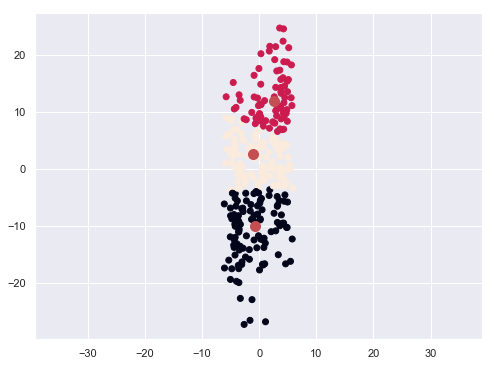

3


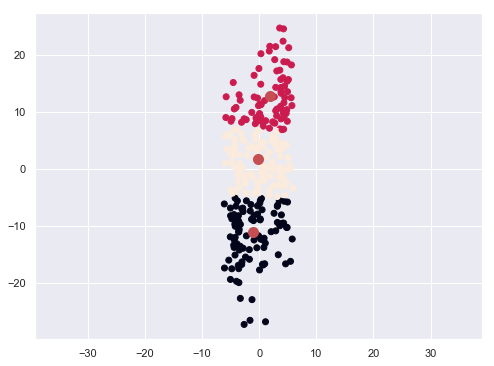

3


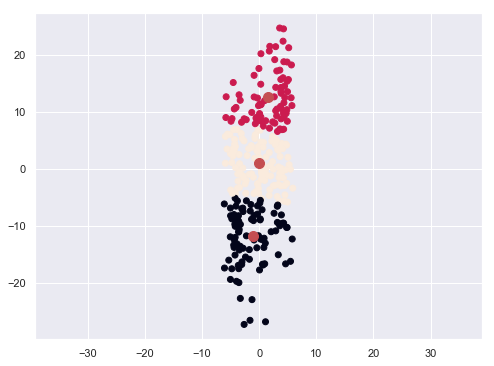

3


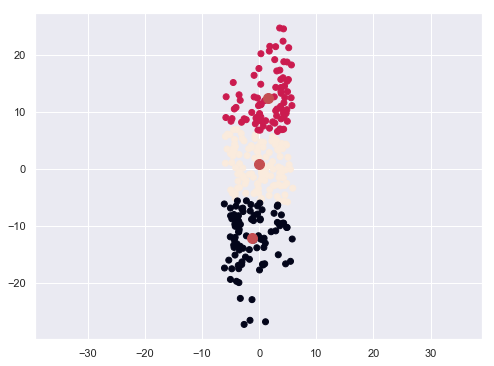

3


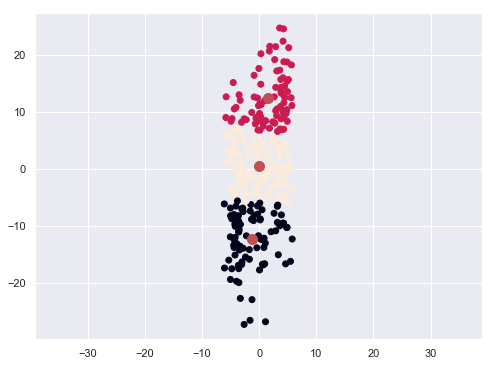

3


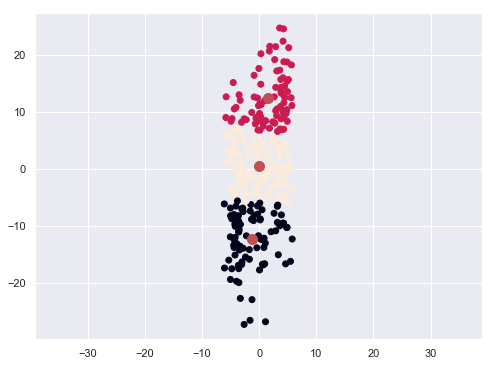

3
Clusters converged in 7 iterations


In [7]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [8]:
print(centroids)

[[-1.25793266e+00 -1.22896841e+01]
 [ 1.56245096e+00  1.23464598e+01]
 [ 6.00160862e-03  5.40503555e-01]]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Dataset that plays nicely with k-Means')

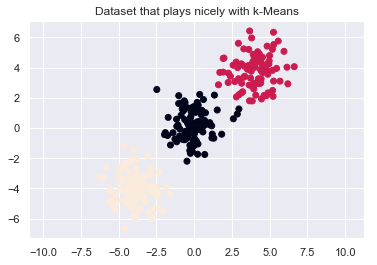

In [9]:
points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[1, 0], [0, 1]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[1, 0], [0, 1]] , 100))))
true_class_colors = np.hstack((np.ones(100),np.ones(100)*2,np.ones(100)*3))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')
plt.title('Dataset that plays nicely with k-Means')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


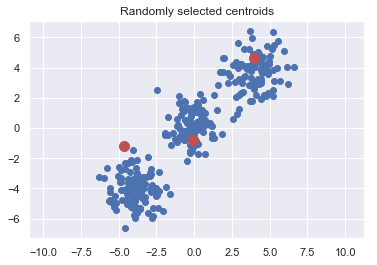

In [10]:
centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

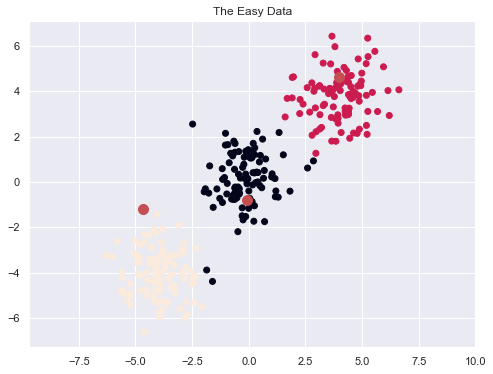

3


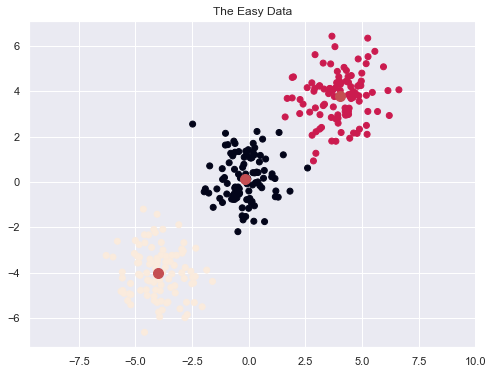

3


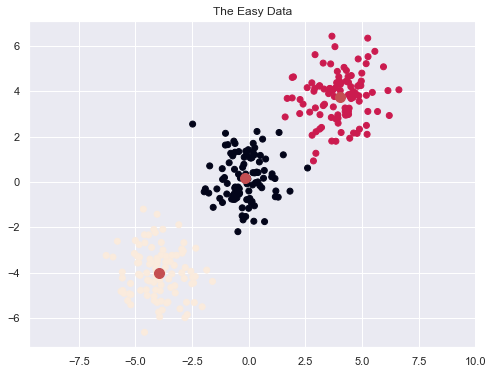

3
Clusters converged in 2 iterations


In [11]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.title('The Easy Data')
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

In [12]:
print(centroids)

[[-0.16604918  0.1898791 ]
 [ 4.00757262  3.74932354]
 [-3.97120782 -4.00973393]]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Dataset that plays nicely with k-Means')

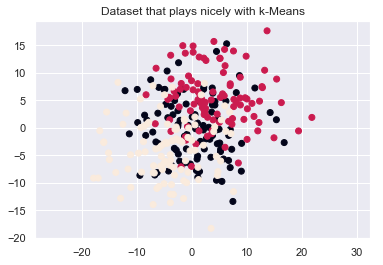

In [13]:
points = np.vstack(((np.random.multivariate_normal([0, 0], [[35, 0], [0, 35]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[35, 0], [0, 35]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[35, 0], [0, 35]] , 100))))
true_class_colors = np.hstack((np.ones(100)*0,np.ones(100)*1,np.ones(100)*2))

plt.scatter(points[:, 0], points[:, 1],c=true_class_colors)
plt.axes().set_aspect('equal', 'datalim')
plt.title('Dataset that plays nicely with k-Means')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


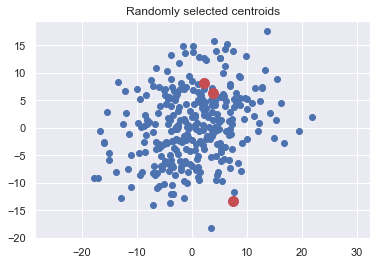

In [14]:
centroids = get_random_centroids(points,k)
plt.scatter(points[:, 0], points[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.title('Randomly selected centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

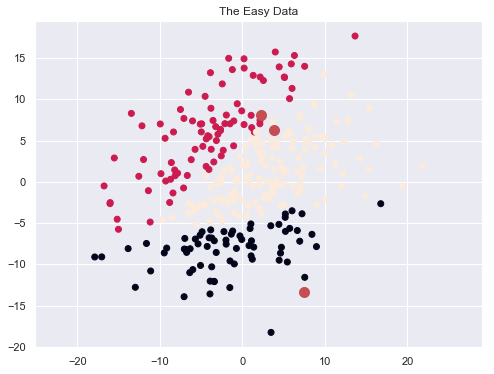

3


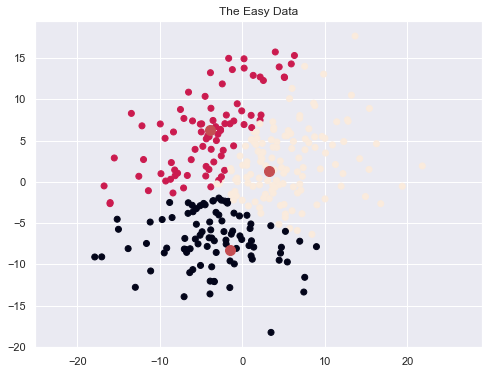

3


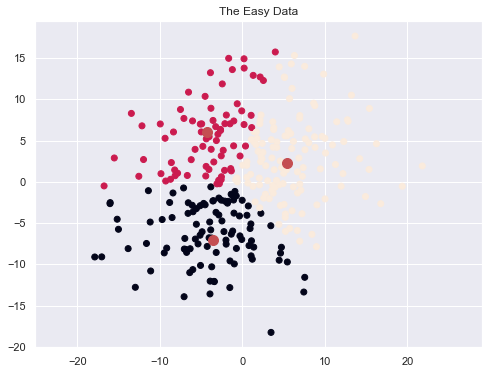

3


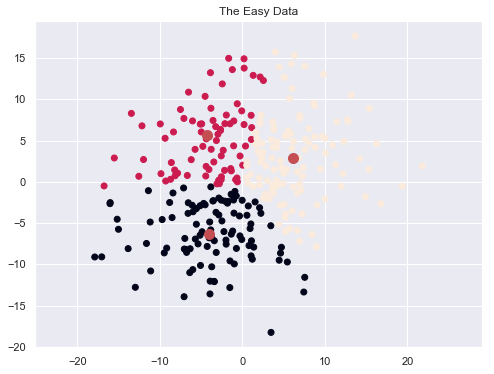

3


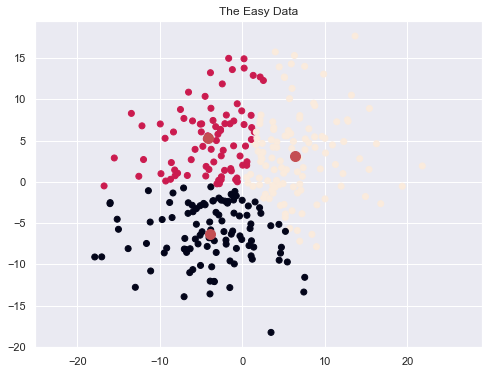

3


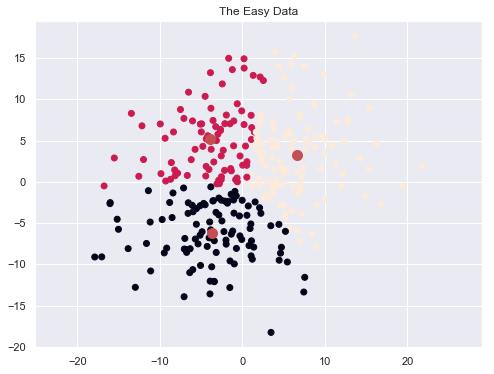

3


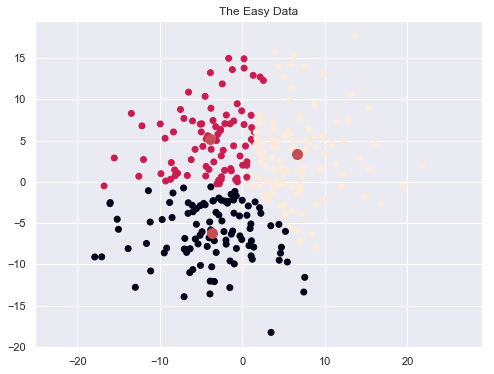

3


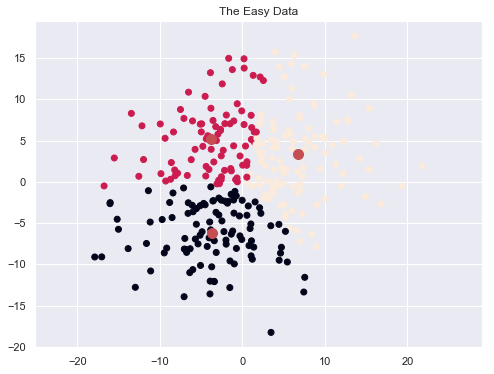

3


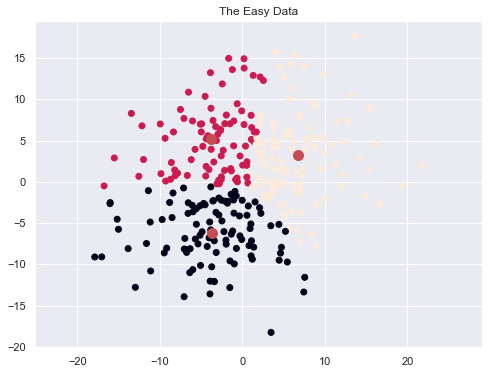

3


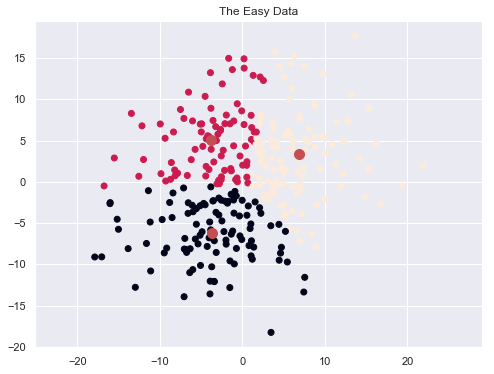

3
Clusters converged in 9 iterations


In [15]:
last_closest = []
for i in range(max_iterations):
    closest = get_nearest_centroid_for_all_points(points,centroids)
    plt.figure(figsize=(8,6))
    plt.axes().set_aspect('equal', 'datalim')
    plt.scatter(points[:, 0], points[:, 1],c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
    plt.title('The Easy Data')
    plt.show()
    centroids = move_centroids(points, closest, centroids)
    if(np.array_equal(last_closest,closest)):
        print('Clusters converged in %d iterations' % i)
        break
    last_closest = closest

# Solo hice el 3